#### Script Overview:

This script aims to perform Exploratory Data Analysis (EDA) and Feature Engineering on a dataset. The EDA process allows us to better understand the nature of the data and identify patterns, trends, and potential relationships between variables. 

On the other hand, Feature Engineering is crucial to prepare the data for modeling, including creating or transforming variables to improve the performance of predictive models. This step will be break into three subtopics: 

- a) Correlation Matrix:
Explore relationships between variables.
Identify correlation patterns to guide feature selection.

- b) Data Scaling:
Standardize or Normalize variables to ensure they are on the same scale.
Prevent bias in models due to different scales of variables.

- c) Principal Component Analysis (PCA):
Reduce the dimensionality of data while retaining most of the variance.
Identify the key components that explain variability in the data.
Facilitate visualization and interpretation of data in reduced dimensions.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

### 1. Set up

In [18]:
data = pd.read_csv('/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [19]:
data.shape

(167, 10)

In [20]:
data.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44       56.20      

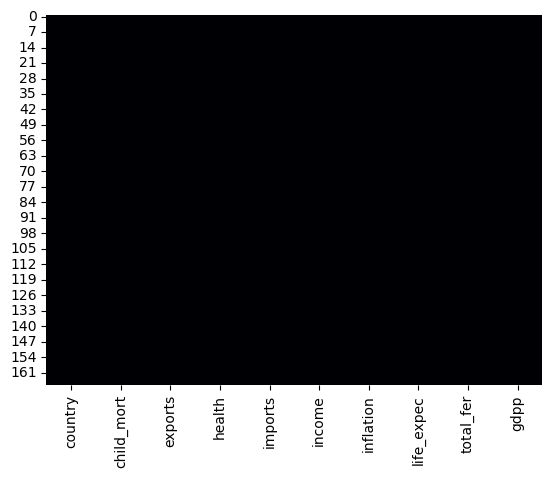

In [21]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);


We do not have null values in our dataset

In [22]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


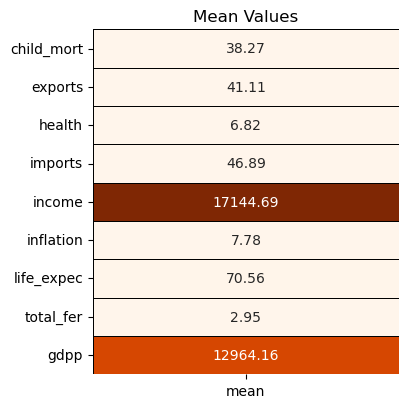

In [23]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

### 2. Exploratory Data Analysis

In [24]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


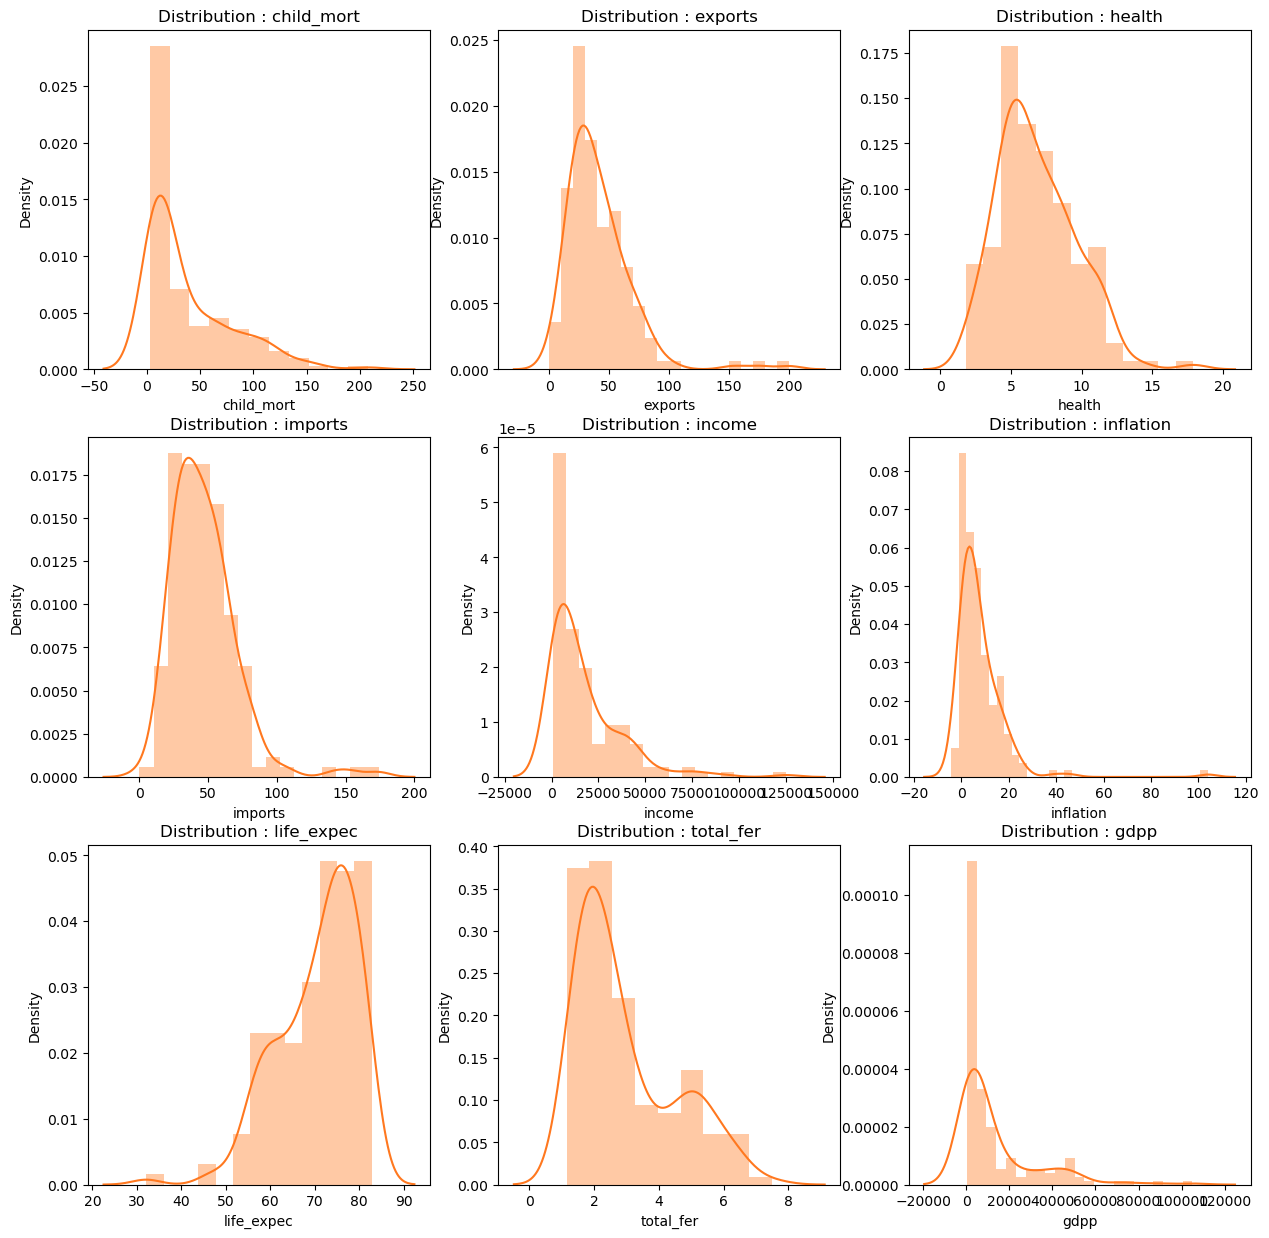

In [25]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [26]:
len(data['country'].unique()) == len(data)


True

#### OUTLIERS DETECTION

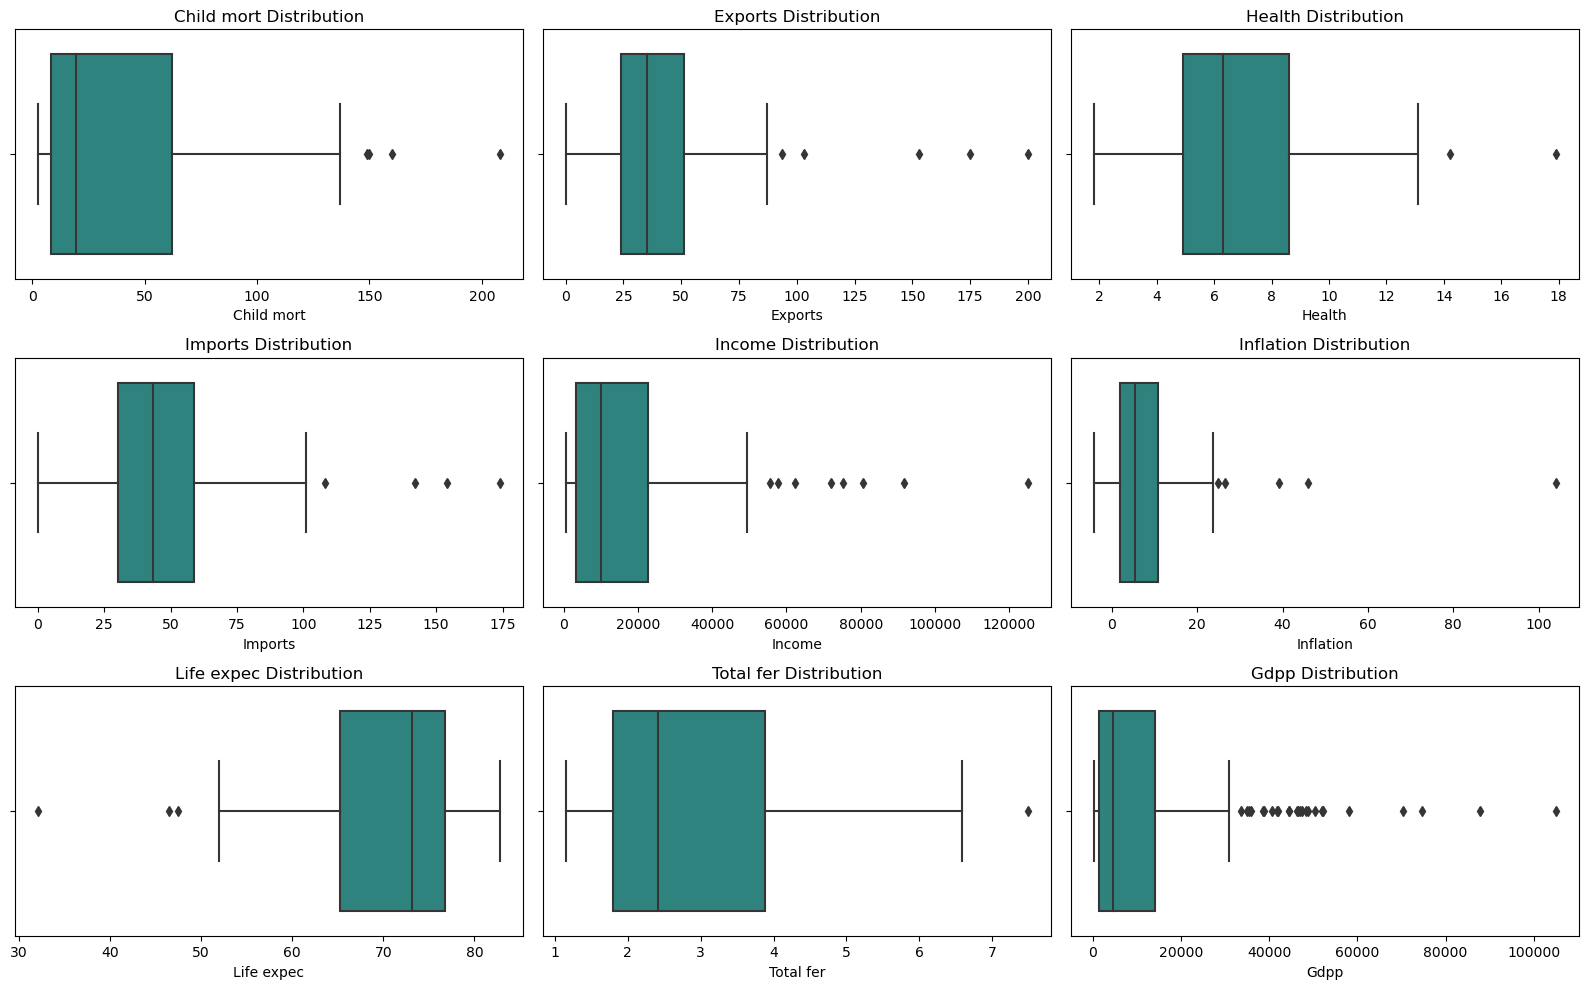

In [27]:
# Plotting boxplots for key variables to identify outliers
plt.figure(figsize=(16, 10))

for i, variable in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[variable], palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} Distribution')
    plt.xlabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

### Visualization Summary:

1) Child Mortality Rate Distribution: While most countries exhibit a low child mortality rate, there is a pronounced tail with certain nations experiencing notably high rates. 

2) Income Distribution: The income distribution is right-skewed, featuring a majority of countries with low income and a minority with significantly higher income. 

3) Inflation Rate Distribution: The majority of countries maintain an inflation rate between -5 and 20. However, a few outliers deviate with extremely high inflation. 

4) Life Expectancy Distribution: The life expectancy across most countries falls within the range of 60 to 80 years, with some exceptions.

5) GDP per Capita: Some countries have an exceptionally high GDP per capita

### 3. Feature Engineering: 
    - Correlation matrix
    - Data scaling
    - PCA

#### 3.1. Correlation Matrix: Pearson, Kendall and Spearman

<Axes: >

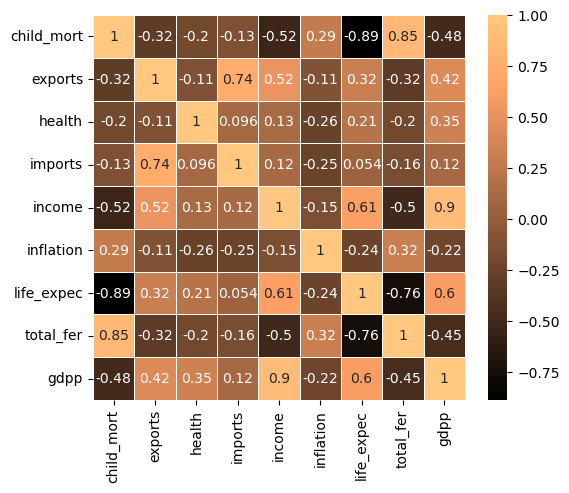

In [28]:
# pearson
plt.figure(figsize=(6,5))
sns.heatmap(data[numerical_features].corr(method='pearson', min_periods=1), annot=True, linewidths=.5, cmap="copper")


<Axes: >

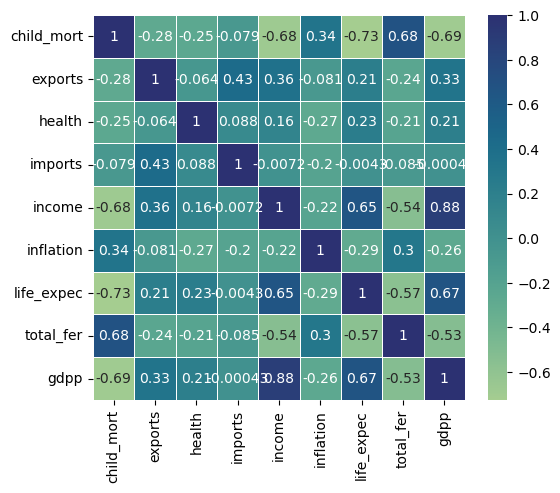

In [29]:
# Kendall
plt.figure(figsize=(6,5))
sns.heatmap(data[numerical_features].corr(method='kendall', min_periods=1), annot=True, linewidths=.5, cmap="crest")

<Axes: >

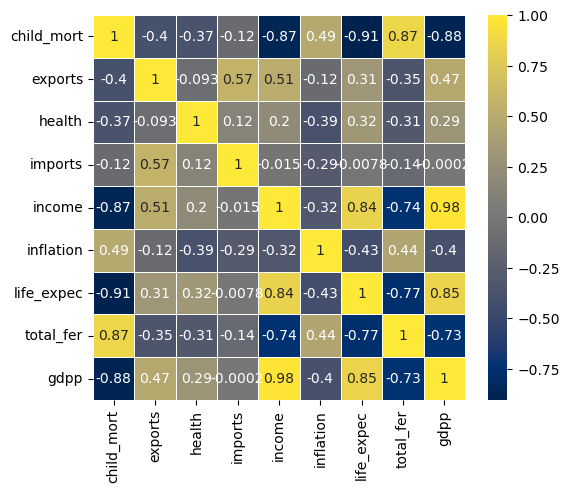

In [30]:
# Spearman
plt.figure(figsize=(6,5))
sns.heatmap(data[numerical_features].corr(method='spearman', min_periods=1), annot=True, linewidths=.5, cmap="cividis")

#### Observations:

- The child mortality rate (child_mort) noticeably increases as income, GDP per capita (gdpp), and exports decrease. A rise in inflation also corresponds to higher child mortality cases, highlighting the impactful role of economic conditions.

- Export growth has a significant impact on economic indicators.
An increase in exports clearly boosts GDP per capita, income, and imports. Conversely, a decline in exports may have adverse effects on these indicators.
Health spending contributes to positive outcomes.

- Investments in health exhibit a modest rise in life expectancy and a simultaneous reduction in the child mortality rate. This emphasizes the role of health expenditure in shaping societal well-being.
Strong correlations and patterns in economic indicators.

- There is a strong correlation of 0.9 between income and GDP per capita. Higher income is associated with increased life expectancy and a significant decrease in the total fertility rate (total_fer).
Adverse effects of high inflation on financial features.

- High inflation is linked to a rise in the total fertility rate and child mortality, indicating typical characteristics of less economically developed nations.
Positive impact of life expectancy on fertility rates.

- Higher life expectancy is associated with lower total fertility rates. Additionally, higher GDP per capita leads to increased spending on health.
Feature categorization for normalization.




#### 3.2. Data Scaling

In [31]:
data[numerical_features]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


In [32]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = data[numerical_features]
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


We will try two techniques for scaling: normalization and standardization

In [35]:
# Scale the data: MinMaxScaler (normalised)

 
columns = dataset.columns

scaler = MinMaxScaler()

rescaled_dataset_minmax = scaler.fit_transform(dataset)
rescaled_dataset_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [36]:
# Scale the data: StandardScaler (standardised)

 
columns = dataset.columns

scaler = StandardScaler()

rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [49]:
# minmax
df_minmax = pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )
df_folder_path = '/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_minmax.csv'
df_minmax.to_csv(df_folder_path, index=False)
df_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.36,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,0.29,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,0.15,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,0.06,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,0.26,0.34,0.15,0.05,0.88,0.15,0.11
...,...,...,...,...,...,...,...,...,...
162,0.13,0.23,0.21,0.30,0.02,0.06,0.61,0.37,0.03
163,0.07,0.14,0.19,0.10,0.13,0.46,0.85,0.21,0.13
164,0.10,0.36,0.31,0.46,0.03,0.15,0.81,0.13,0.01
165,0.26,0.15,0.21,0.20,0.03,0.26,0.70,0.56,0.01


In [48]:
# standardisation
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_folder_path = '/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_standard.csv'
df_standard.to_csv(df_folder_path, index=False)
df_standard

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68
1,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49
2,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47
3,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52
4,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04
...,...,...,...,...,...,...,...,...,...
162,-0.23,0.20,-0.57,0.24,-0.74,-0.49,-0.85,0.37,-0.55
163,-0.53,-0.46,-0.70,-1.21,-0.03,3.62,0.55,-0.32,0.03
164,-0.37,1.13,0.01,1.38,-0.66,0.41,0.29,-0.66,-0.64
165,0.45,-0.41,-0.60,-0.52,-0.66,1.50,-0.34,1.14,-0.64


#### 3.3. Principal Component Analysis (PCA)

 - At this point, we are applying Principal Component Analysis (PCA) to the previously normalized and standardized datasets.
 - PCA is employed to reduce the dimensionality of the data, retaining essential features and eliminating redundancies.
 - Dimensionality reduction will facilitate visualization, analysis, and interpretation of the data, potentially improving the performance of machine learning algorithms.
 - This technique is particularly useful when dealing with high-dimensional datasets, aiding in pattern identification and simplifying data complexity.


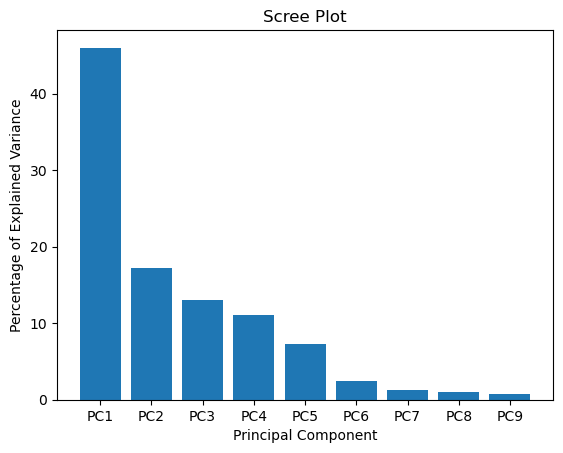

In [39]:
# PCA with data scaled with StandardScaler

# import PCA 
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_standard)
pca_standard_variance = pca.explained_variance_
pca_data_standard = pca.transform(df_standard)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# create a df with the standardized pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)


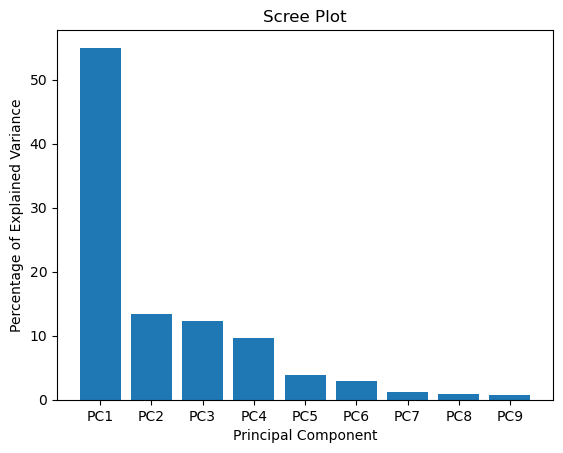

In [40]:
# PCA with data scaled with MinMaxScaler

# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_minmax_variance = pca.explained_variance_
pca_data_minmax = pca.transform(df_minmax)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Create a dataframe with the normalised pca
pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)


In [41]:
pca_standard_variance

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [42]:
pca_minmax_variance

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

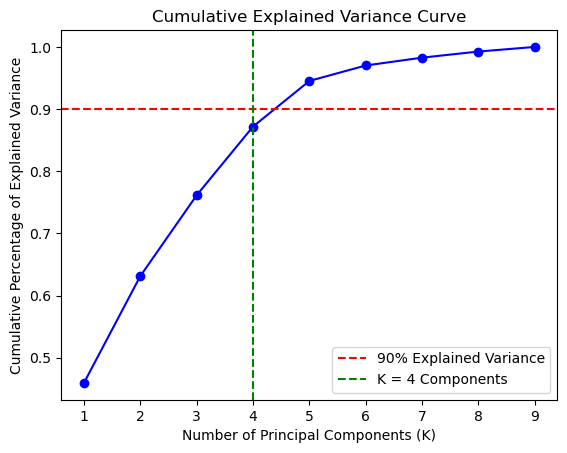

Suggested number of components for approximately 90% explained variance: 4


In [43]:

# Explained variances by principal components
explained_variance = pca_standard_variance 

# Calculate total variance
total_variance = np.sum(explained_variance)

# Calculate cumulative percentage of explained variance
cumulative_variance = np.cumsum(explained_variance) / total_variance

# Find the number of components with explained variance just below 90%
target_explained_variance = 0.90
k_components_target = np.argmax(cumulative_variance >= target_explained_variance)  # No +1 to get just below the target

# Plot the cumulative explained variance curve
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=target_explained_variance, color='r', linestyle='--', label=f'{int(target_explained_variance*100)}% Explained Variance')
plt.axvline(x=k_components_target, color='g', linestyle='--', label=f'K = {k_components_target} Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Cumulative Percentage of Explained Variance')
plt.title('Cumulative Explained Variance Curve')
plt.legend()
plt.show()

# Print the suggested number of components for approximately 90% explained variance
print(f'Suggested number of components for approximately {int(target_explained_variance*100)}% explained variance: {k_components_target}')


In [50]:
# We will create a dataset with pca_standardized 

# dataframe with PC1, PC2, P3, PC4
pca4_df_standard = pca_df_standard.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
df_folder_path = '/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca4_df_standard.csv'
pca4_df_standard.to_csv(df_folder_path, index=False)
pca4_df_standard

,PC1,PC2,PC3,PC4
0,-2.91,0.10,-0.72,1.01
1,0.43,-0.59,-0.33,-1.16
2,-0.29,-0.46,1.22,-0.87
3,-2.93,1.70,1.53,0.84
4,1.03,0.14,-0.23,-0.85
...,...,...,...,...
162,-0.82,0.64,-0.39,-0.71
163,-0.55,-1.23,3.10,-0.12
164,0.50,1.39,-0.24,-1.07
165,-1.89,-0.11,1.11,0.06


In [56]:
# We will also create a dataset with 5 pca_standardized 

# dataframe with PC1, PC2, P3, PC4, PC5
pca5_df_standard = pca_df_standard.drop(['PC6','PC7','PC8','PC9'], axis = 1)
df_folder_path = '/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca5_df_standard.csv'
pca5_df_standard.to_csv(df_folder_path, index=False)
pca5_df_standard

,PC1,PC2,PC3,PC4,PC5
0,-2.91,0.10,-0.72,1.01,-0.16
1,0.43,-0.59,-0.33,-1.16,0.17
2,-0.29,-0.46,1.22,-0.87,0.16
3,-2.93,1.70,1.53,0.84,-0.27
4,1.03,0.14,-0.23,-0.85,-0.19
...,...,...,...,...,...
162,-0.82,0.64,-0.39,-0.71,-0.40
163,-0.55,-1.23,3.10,-0.12,2.08
164,0.50,1.39,-0.24,-1.07,1.18
165,-1.89,-0.11,1.11,0.06,0.62


#### Findings

Upon conducting PCA using both the standardized and normalized versions of the original dataset, utilizing 4 principal components can capture approximately 90% of the distribution within the original data.

In [57]:
df_folder_path = '/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/data.csv'
data.to_csv(df_folder_path, index=False)